In [1]:
import pandas as pd

In [4]:
def accuracy(y_true, y_pred):
    return (y_true==y_pred).sum()/len(y_true)

In [22]:
# Whole dataset

models = []
models.append(pd.read_pickle("Good_CNNx4+BN+DO_model-I-1.7(nonneg)-all.pkl"))
models.append(pd.read_pickle("Good_MLPx4+BN+DO_model-II-Copy1.5-all.pkl"))
models.append(pd.read_pickle("Great_MLPx4+BN+DO_model-Copy1.5-all.pkl"))
models.append(pd.read_pickle("great_model-Copy1.5-all.pkl"))
models.append(pd.read_pickle("really_great_model-Copy1.5-all.pkl"))
models.append(pd.read_pickle("really_really_great_model-Copy1.5-all.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-II-1.7(nonneg)-all.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-III-1.7-all.pkl"))
models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-ELU_model-IV-1.7-all.pkl"))
#models.append(pd.read_pickle("PossiblyAwesome_CNNx4+BN+DO+Batch40-model-I-1.7(nonneg)-all.pkl"))

models = pd.concat(models, axis=1)

true = pd.read_pickle("results-all.pkl")
pred = models.median(axis=1)

Actual data ratio: 47.06% Positive, 52.94% Negative
Prediction data ratio: 57.75% Positive, 42.25% Negative

Classification Metrics

Won : 103
Lost : 84
Total : 187
Diff : 19

Accuracy : 55.08%
Information Coefficient (Edge): 10.16%
Expected Value (Annualised): 5131.39%

Precision: Of all the predicted Buys/Sells, how many were correct?
Precision (Buy) : 51.85%
Precision (Sell): 59.49%

Recall: Of all the actual Buys/Sells, how many were correct?
Recall (Buy): 63.64%
Recall (Sell): 47.47%

F1 Score: Harmonic mean of Precision and Recall for the Buys/Sells
F1 Score (Buy): 57.14%
F1 Score (Sell): 52.81%


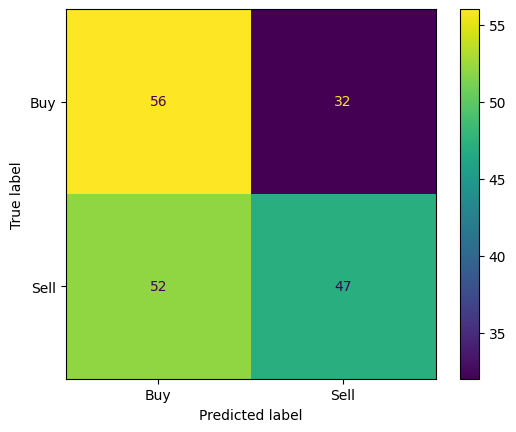

In [8]:
from tradeframework.api.insights import InsightManager
import warnings
warnings.filterwarnings("ignore")

print(f"Actual data ratio: {len(true.values[true>0])/len(true):.2%} Positive, {len(true.values[true<0])/len(true):.2%} Negative")
print(f"Prediction data ratio: {len(pred.values[pred>0])/len(pred):.2%} Positive, {len(pred.values[pred<0])/len(pred):.2%} Negative")

im = InsightManager(None)
im.addInsightGenerator(im.createInsightGenerator("ConfusionMatrix", opts={"actual":true[0], "predictions":pred, "noHold":True, "returnsData":False}))
#im.addInsightGenerator(im.createInsightGenerator("ConfusionMatrix", opts={"baseline":p.assets[0], "noHold":True}))

results = im.generateInsights()

In [36]:
len(true)

1342

<AxesSubplot:xlabel='Date_Time'>

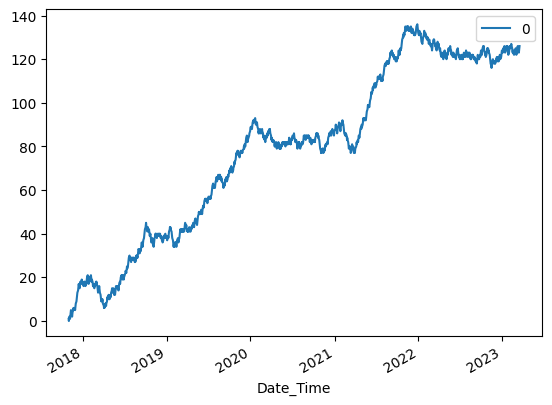

In [37]:
pd.DataFrame(np.cumsum(pred), pred.index).plot()

<AxesSubplot:xlabel='Date_Time'>

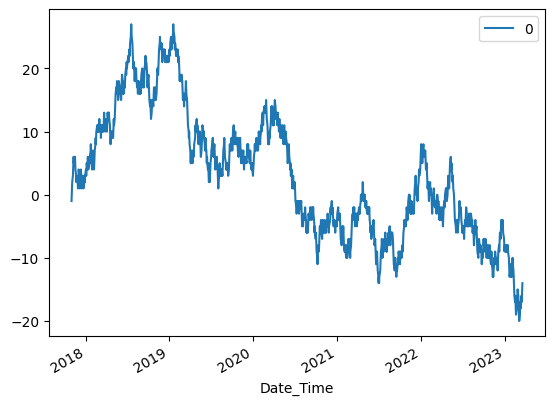

In [32]:
import numpy as np
a = true[0].values
b = pred.values
vals = np.ones(len(pred))
vals[a!=b]=-1
pd.DataFrame(np.cumsum(vals), pred.index).plot()


<AxesSubplot:xlabel='Date_Time'>

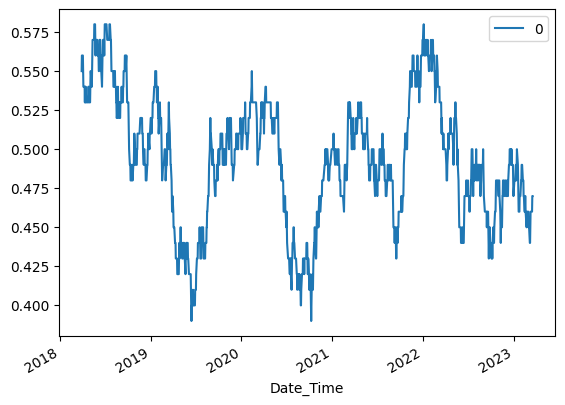

In [23]:
window = 100
a = true[0].values
b = pred.values
acc = [accuracy(a[n:n+window], b[n:n+window]) for n in range(len(true)-window)]
pd.DataFrame(acc, index=true.index[window:]).plot()